In [14]:
from keras.datasets import mnist
(_,_),(X1,y1)=mnist.load_data()

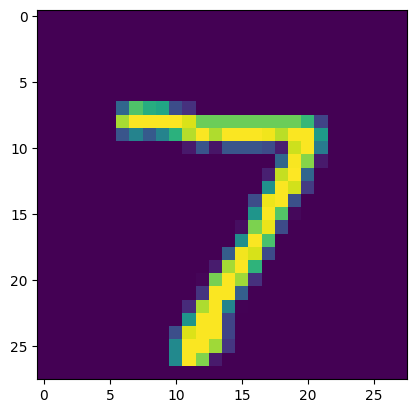

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X1[0])

In [3]:
from sklearn.model_selection import train_test_split
x_data,x_test,y_data,y_test=train_test_split(X1,y1,test_size=0.3,stratify=y1)
train_x,val_x,train_y,val_y=train_test_split(x_data,y_data,test_size=0.2,stratify=y_data)

In [4]:
x_data.shape,y_data.shape,train_x.shape,train_y.shape,val_x.shape,val_y.shape

((7000, 28, 28), (7000,), (5600, 28, 28), (5600,), (1400, 28, 28), (1400,))

In [5]:
rs_x_data=x_data.reshape(-1,28,28,1)
rs_train_x=train_x.reshape(-1,28,28,1)
rs_val_x=val_x.reshape(-1,28,28,1)

In [6]:
rs_x_data.shape,rs_train_x.shape,rs_val_x.shape

((7000, 28, 28, 1), (5600, 28, 28, 1), (1400, 28, 28, 1))

In [7]:
from keras.utils import to_categorical
ct_y_data=to_categorical(y_data)
ct_train_y=to_categorical(train_y)
ct_val_y=to_categorical(val_y)

In [8]:
ct_y_data.shape,ct_train_y.shape,ct_val_y.shape

((7000, 10), (5600, 10), (1400, 10))

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
m=Sequential()
m.add(Conv2D(10,3,padding='same',activation='relu',input_shape=rs_train_x.shape[1:]))
m.add(Conv2D(10,3,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Conv2D(10,3,padding='same',activation='relu'))
m.add(MaxPooling2D(2))
m.add(Flatten())
m.add(Dense(10,activation='softmax'))
m.summary()
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics='acc')
hy=m.fit(rs_train_x,ct_train_y,validation_data=(rs_val_x,ct_val_y),epochs=10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 10)        910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 10)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 490)               0

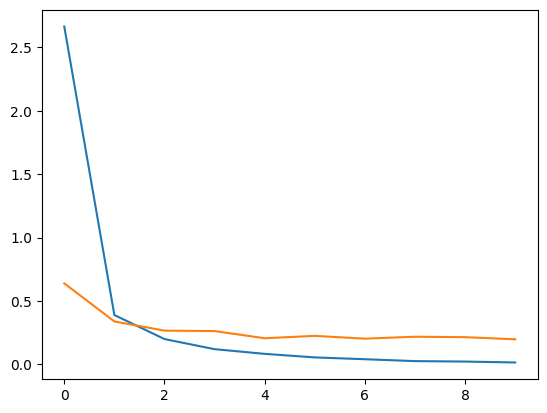

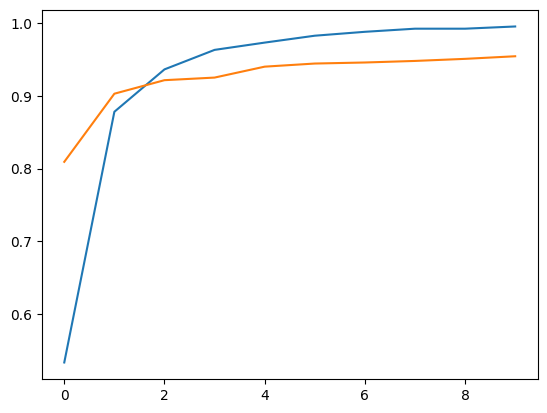

In [10]:
import matplotlib.pyplot as plt

plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

In [11]:
import tensorflow as tf
from tensorflow import keras
# 예측기 생성
def predict_digit(image):
    # 입력 이미지를 모델에 맞는 형태로 변환
    image = image.reshape(1, 28, 28, 1)
    # 예측 수행
    predictions = m.predict(image)
    # 가장 높은 확률을 가지는 클래스를 예측 결과로 반환
    return tf.argmax(predictions[0])

In [12]:
# 테스트 이미지로 예측 수행
test_index = 55  # 원하는 테스트 이미지의 인덱스
predicted_label = predict_digit(x_test[test_index])
print("Predicted Label:", predicted_label.numpy())
print("True Label:", y_test[test_index])

1/1 [==============================] - 0s 180ms/step
Predicted Label: 2
True Label: 2


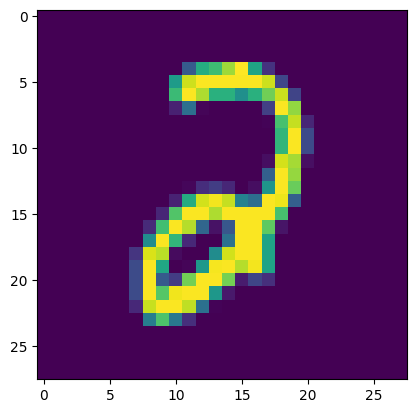

In [13]:
plt.imshow(x_test[55])